In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('cora.csv') #Importamos el data set a utilizar
dataset.head()
#ageage in years
#sex(1 = male; 0 = female)
#cpchest pain type
#trestbpsresting blood pressure (in mm Hg on admission to the hospital)
#cholserum cholestoral in mg/dl
#fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecgresting electrocardiographic results
#thalachmaximum heart rate achieved
#exangexercise induced angina (1 = yes; 0 = no)
#oldpeakST depression induced by exercise relative to rest
#lopethe slope of the peak exercise ST segment
#canumber of major vessels (0-3) colored by flourosopy
#thal3 = normal; 6 = fixed defect; 7 = reversable defect
#target1 or 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
X = dataset.iloc[:, [4, 2]].values #Elegimos chol y thalach
y = dataset.iloc[:, 8].values #elegimos el target

In [4]:
X

array([[233,   3],
       [250,   2],
       [204,   1],
       [236,   1],
       [354,   0],
       [192,   0],
       [294,   1],
       [263,   1],
       [199,   2],
       [168,   2],
       [239,   0],
       [275,   2],
       [266,   1],
       [211,   3],
       [283,   3],
       [219,   2],
       [340,   2],
       [226,   3],
       [247,   0],
       [239,   3],
       [234,   0],
       [233,   2],
       [226,   0],
       [243,   2],
       [199,   3],
       [302,   1],
       [212,   2],
       [175,   2],
       [417,   2],
       [197,   2],
       [198,   1],
       [177,   0],
       [219,   1],
       [273,   2],
       [213,   3],
       [177,   2],
       [304,   2],
       [232,   2],
       [269,   2],
       [360,   2],
       [308,   2],
       [245,   1],
       [208,   0],
       [264,   0],
       [321,   2],
       [325,   1],
       [235,   2],
       [257,   2],
       [216,   2],
       [234,   0],
       [256,   2],
       [302,   0],
       [231,

In [5]:
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)
# Ajuste
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train

array([[-0.43596979,  0.9870291 ],
       [-0.32539421, -0.91982712],
       [-0.28853568,  0.9870291 ],
       [ 0.4117763 ,  1.94045721],
       [-0.34382347, -0.91982712],
       [-0.030526  , -0.91982712],
       [-0.08581379, -0.91982712],
       [-1.33900366,  0.9870291 ],
       [-0.15953084, -0.91982712],
       [ 0.65135672,  0.03360099],
       [ 0.94622493, -0.91982712],
       [-0.65712094,  0.9870291 ],
       [-0.04895527,  0.9870291 ],
       [-0.19638937, -0.91982712],
       [ 1.03837124, -0.91982712],
       [-0.73083799,  0.03360099],
       [-0.25167716,  1.94045721],
       [-0.74926725, -0.91982712],
       [ 1.35166871,  0.9870291 ],
       [ 0.28277146, -0.91982712],
       [-0.030526  ,  0.03360099],
       [ 1.60967839, -0.91982712],
       [ 0.09847884,  0.9870291 ],
       [-1.3205744 , -0.91982712],
       [ 0.85407861, -0.91982712],
       [ 0.08004957,  0.9870291 ],
       [ 1.37009797, -0.91982712],
       [-0.01209674, -0.91982712],
       [ 0.13533736,

In [8]:
X_test

array([[-1.35743293, -0.91982712],
       [-0.380682  ,  1.94045721],
       [ 0.74350304,  1.94045721],
       [ 0.19062515, -0.91982712],
       [-0.30696495,  0.9870291 ],
       [ 0.48549336, -0.91982712],
       [-1.48643777, -0.91982712],
       [ 0.1169081 , -0.91982712],
       [ 0.74350304, -0.91982712],
       [ 1.51753207, -0.91982712],
       [-2.24203754,  0.9870291 ],
       [ 0.39334704, -0.91982712],
       [ 0.1169081 , -0.91982712],
       [ 0.33805925,  0.03360099],
       [-0.5281161 ,  0.9870291 ],
       [-0.47282831,  0.9870291 ],
       [-0.27010642, -0.91982712],
       [ 0.13533736,  0.9870291 ],
       [ 0.35648852, -0.91982712],
       [-0.14110158,  0.9870291 ],
       [-0.39911126, -0.91982712],
       [-0.5281161 , -0.91982712],
       [ 0.6144982 ,  0.03360099],
       [-0.76769652, -0.91982712],
       [-0.23324789,  0.03360099],
       [ 0.28277146,  0.9870291 ],
       [-0.65712094, -0.91982712],
       [ 0.02476178, -0.91982712],
       [-0.50968684,

In [9]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
#Preediccion
y_pred = classifier.predict(X_test)

#Obtenemos la matriz de cofusion 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


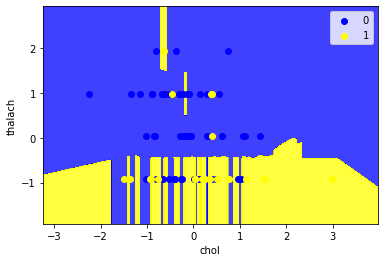

In [10]:
# Grafica
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)

plt.xlabel('chol')
plt.ylabel('thalach')
plt.legend()
plt.show()